#**Question 1 - My Books**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [54]:
book=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 9/book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


**Exploratory Data Analysis**

In [55]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [56]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [58]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [59]:
book.shape

(2000, 11)

In [60]:
book.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [61]:
book.duplicated().sum()

1680

In [62]:
# examine duplicated rows
book.loc[book.duplicated(), :]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [63]:
book = book.drop_duplicates()
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


In [64]:
book.shape

(320, 11)

In [65]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())
    print()

ChildBks
1    196
0    124
Name: ChildBks, dtype: int64

YouthBks
0    176
1    144
Name: YouthBks, dtype: int64

CookBks
1    218
0    102
Name: CookBks, dtype: int64

DoItYBks
0    163
1    157
Name: DoItYBks, dtype: int64

RefBks
1    162
0    158
Name: RefBks, dtype: int64

ArtBks
1    178
0    142
Name: ArtBks, dtype: int64

GeogBks
1    167
0    153
Name: GeogBks, dtype: int64

ItalCook
0    213
1    107
Name: ItalCook, dtype: int64

ItalAtlas
0    269
1     51
Name: ItalAtlas, dtype: int64

ItalArt
0    259
1     61
Name: ItalArt, dtype: int64

Florence
0    218
1    102
Name: Florence, dtype: int64



**Apriori Algorithm**

**Model 1**

In [66]:
frequent_itemsets = apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
152,0.106250,"(CookBks, ArtBks, DoItYBks, GeogBks)"
153,0.106250,"(CookBks, ArtBks, DoItYBks, ItalCook)"
154,0.103125,"(CookBks, ArtBks, GeogBks, RefBks)"
155,0.112500,"(CookBks, ArtBks, GeogBks, ItalCook)"


In [67]:
rules1 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
...,...,...,...,...,...,...,...,...,...
875,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
876,(CookBks),"(ArtBks, ItalCook, ItalArt)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
877,(ArtBks),"(CookBks, ItalCook, ItalArt)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
878,(ItalCook),"(CookBks, ArtBks, ItalArt)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


In [68]:
rules2 = association_rules(frequent_itemsets,metric='lift',min_threshold=0.6).head(30)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
5,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
6,(ChildBks),(RefBks),0.612500,0.506250,0.340625,0.556122,1.098513,0.030547,1.112356
7,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
8,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949
9,(ArtBks),(ChildBks),0.556250,0.612500,0.365625,0.657303,1.073148,0.024922,1.130738


In [69]:
rules3 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.1)
rules3[rules3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(ItalCook),0.612500,0.334375,0.243750,0.397959,1.190158,0.038945,1.105614
1,(ItalCook),(ChildBks),0.334375,0.612500,0.243750,0.728972,1.190158,0.038945,1.429741
2,(ChildBks),(ItalAtlas),0.612500,0.159375,0.115625,0.188776,1.184474,0.018008,1.036242
3,(ItalAtlas),(ChildBks),0.159375,0.612500,0.115625,0.725490,1.184474,0.018008,1.411607
4,(ChildBks),(ItalArt),0.612500,0.190625,0.137500,0.224490,1.177651,0.020742,1.043668
...,...,...,...,...,...,...,...,...,...
541,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
542,(CookBks),"(ArtBks, ItalCook, ItalArt)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
543,(ArtBks),"(CookBks, ItalCook, ItalArt)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
544,(ItalCook),"(CookBks, ArtBks, ItalArt)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


In [70]:
rules3.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
538,"(CookBks, ItalArt)","(ArtBks, ItalCook)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625
539,"(ArtBks, ItalCook)","(CookBks, ItalArt)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
228,"(ArtBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
532,"(CookBks, ArtBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
545,(ItalArt),"(CookBks, ArtBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
233,(ItalArt),"(ArtBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
189,"(CookBks, ItalArt)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
533,"(CookBks, ArtBks, ItalArt)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
192,(ItalCook),"(CookBks, ItalArt)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097
544,(ItalCook),"(CookBks, ArtBks, ItalArt)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


In [71]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(ItalCook),0.612500,0.334375,0.243750,0.397959,1.190158,0.038945,1.105614
1,(ItalCook),(ChildBks),0.334375,0.612500,0.243750,0.728972,1.190158,0.038945,1.429741
2,(ChildBks),(ItalAtlas),0.612500,0.159375,0.115625,0.188776,1.184474,0.018008,1.036242
3,(ItalAtlas),(ChildBks),0.159375,0.612500,0.115625,0.725490,1.184474,0.018008,1.411607
4,(ChildBks),(ItalArt),0.612500,0.190625,0.137500,0.224490,1.177651,0.020742,1.043668
...,...,...,...,...,...,...,...,...,...
541,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
542,(CookBks),"(ArtBks, ItalCook, ItalArt)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
543,(ArtBks),"(CookBks, ItalCook, ItalArt)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
544,(ItalCook),"(CookBks, ArtBks, ItalArt)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


**Data Visualization for Model 1**

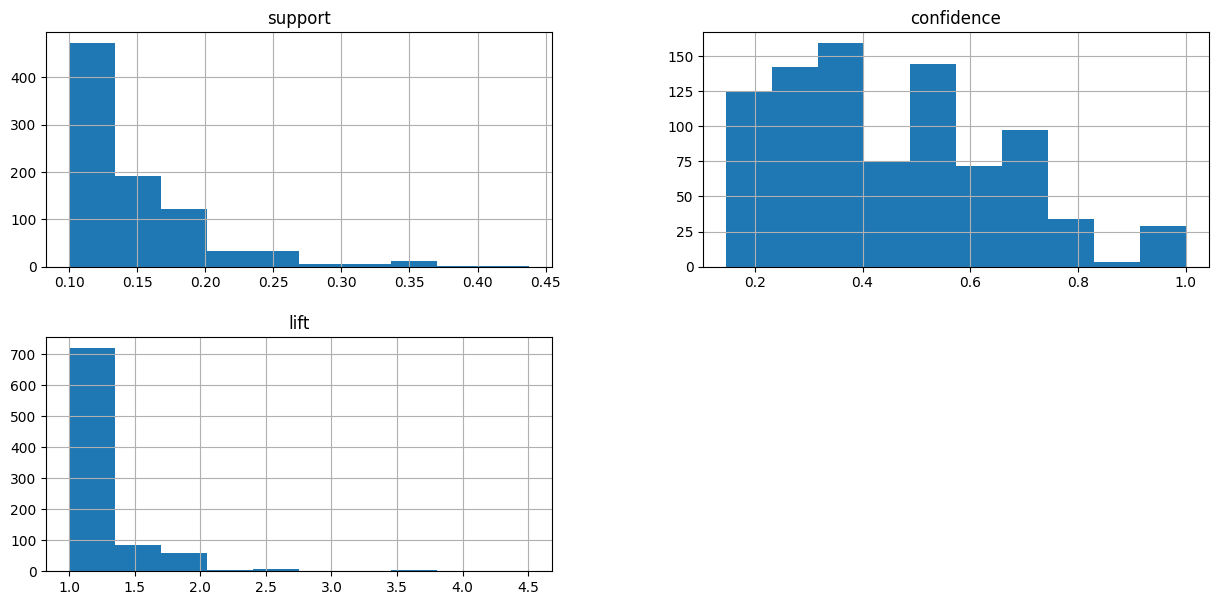

In [72]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

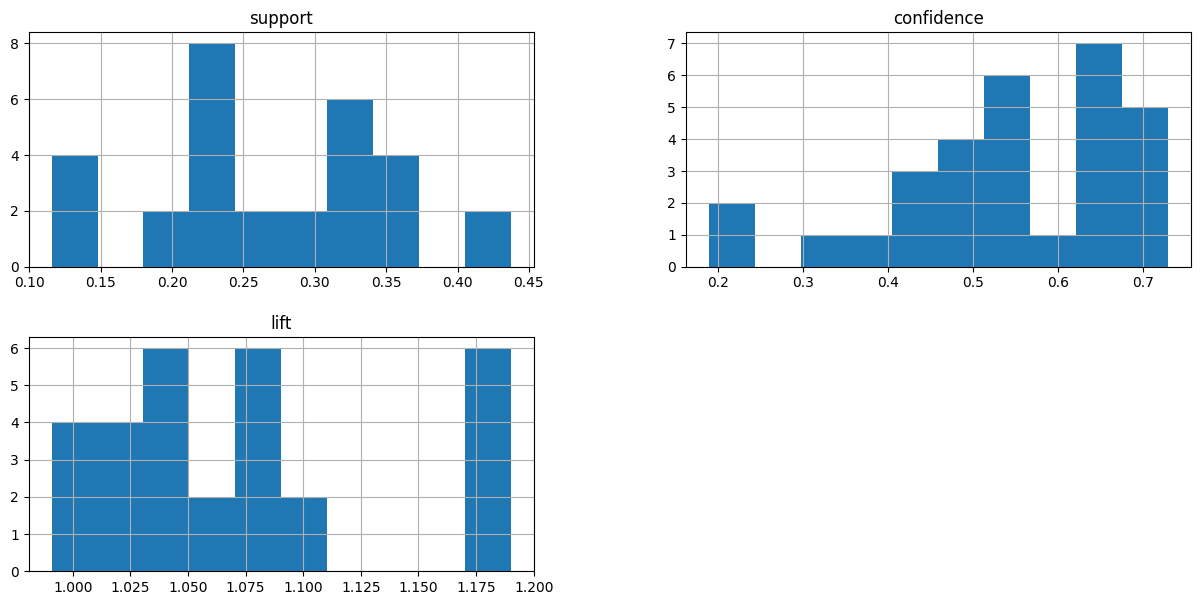

In [73]:
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

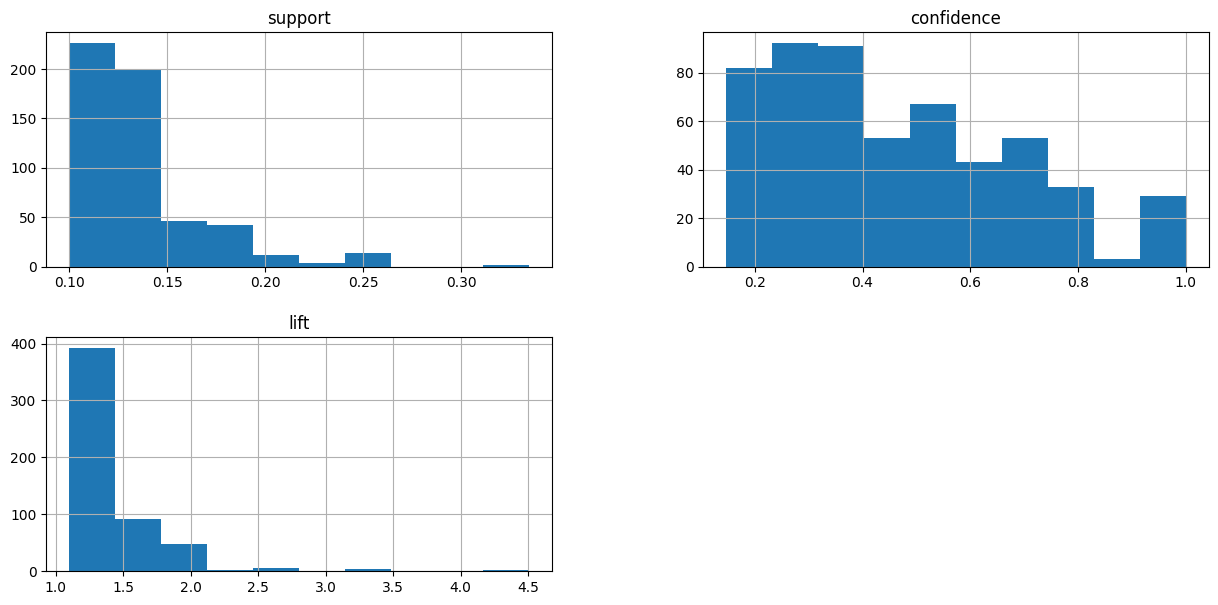

In [74]:
rules3[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

**Model 2**

In [75]:
frequent_itemsets2 = apriori(book,min_support=0.3,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(ChildBks, YouthBks)"


In [76]:
rules4 = association_rules(frequent_itemsets2,metric='lift',min_threshold=1.0)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
5,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
6,(ChildBks),(RefBks),0.612500,0.506250,0.340625,0.556122,1.098513,0.030547,1.112356
7,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
8,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949
9,(ArtBks),(ChildBks),0.556250,0.612500,0.365625,0.657303,1.073148,0.024922,1.130738


In [77]:
rules5 = association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
5,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
6,(ChildBks),(RefBks),0.612500,0.506250,0.340625,0.556122,1.098513,0.030547,1.112356
7,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
8,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949
9,(ArtBks),(ChildBks),0.556250,0.612500,0.365625,0.657303,1.073148,0.024922,1.130738


**Data Visualization for Model 2**

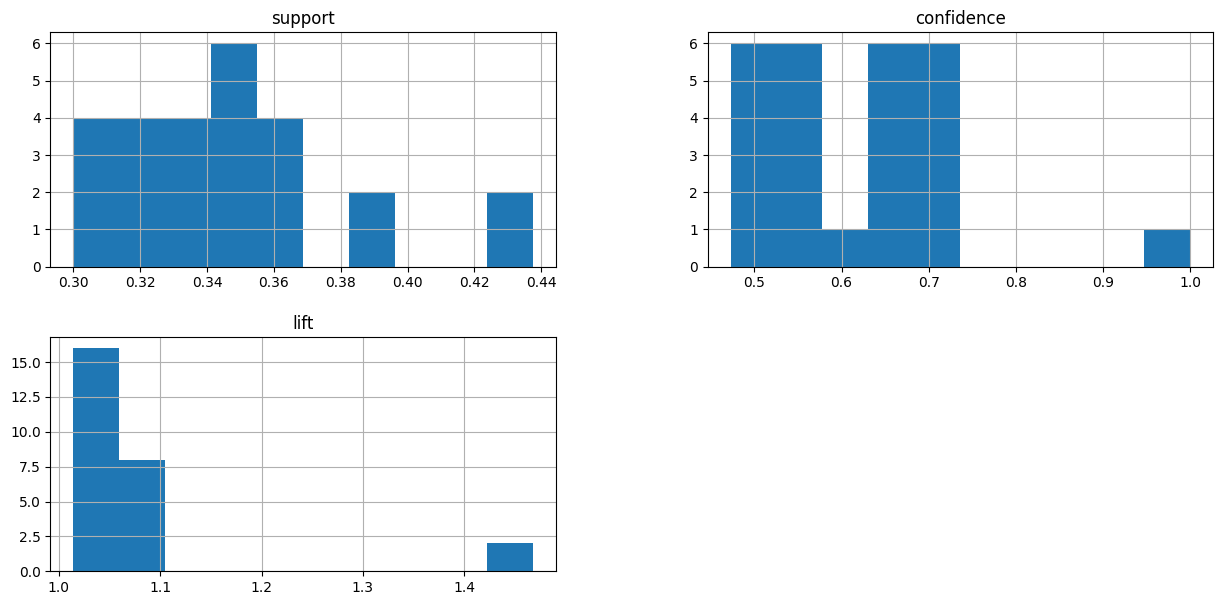

In [78]:
rules4[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

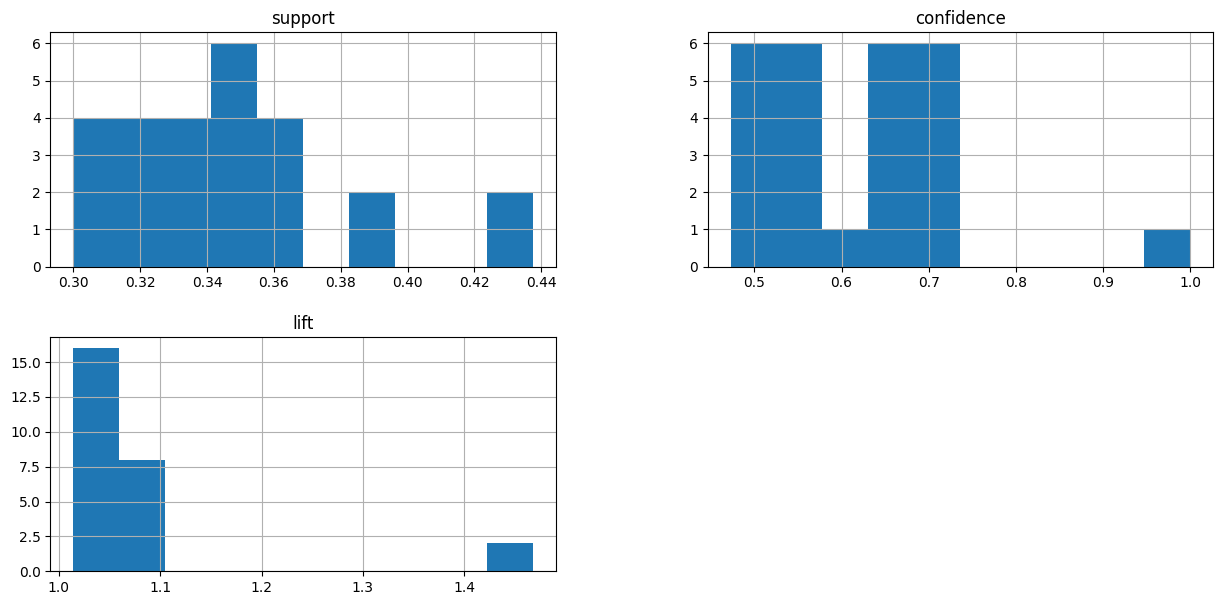

In [79]:
rules5[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

#**Question 2 - My Movies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
movie=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 9/my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
movie2=movie.iloc[:,5:]
movie2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [8]:
for i in movie2.columns:
    print(i)
    print(movie2[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



**Apriori Algorithm**

**Model 1**

In [15]:
frequent_itemsets = apriori(movie2,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [16]:
rules1 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
rules2 = association_rules(frequent_itemsets,metric='lift',min_threshold=0.6).head(30)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.800000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000


In [18]:
rules3 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.1)
rules3[rules3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
231,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
232,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
233,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [19]:
rules3.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
211,"(Harry Potter1, Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
198,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
186,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
219,"(LOTR1, Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
218,"(Harry Potter1, Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
216,"(LOTR1, Sixth Sense, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
214,"(Harry Potter1, LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
213,"(Sixth Sense, Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [20]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
231,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
232,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
233,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


**Data Visualization for Model 1**

In [27]:
# Rule 1

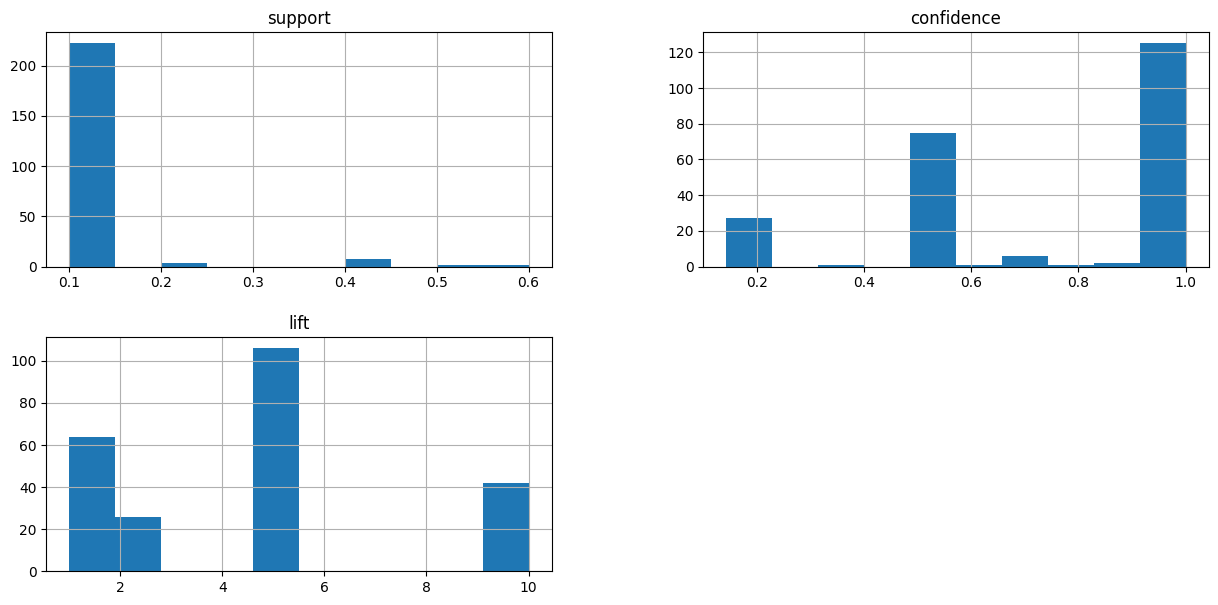

In [28]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [30]:
# Rule 2

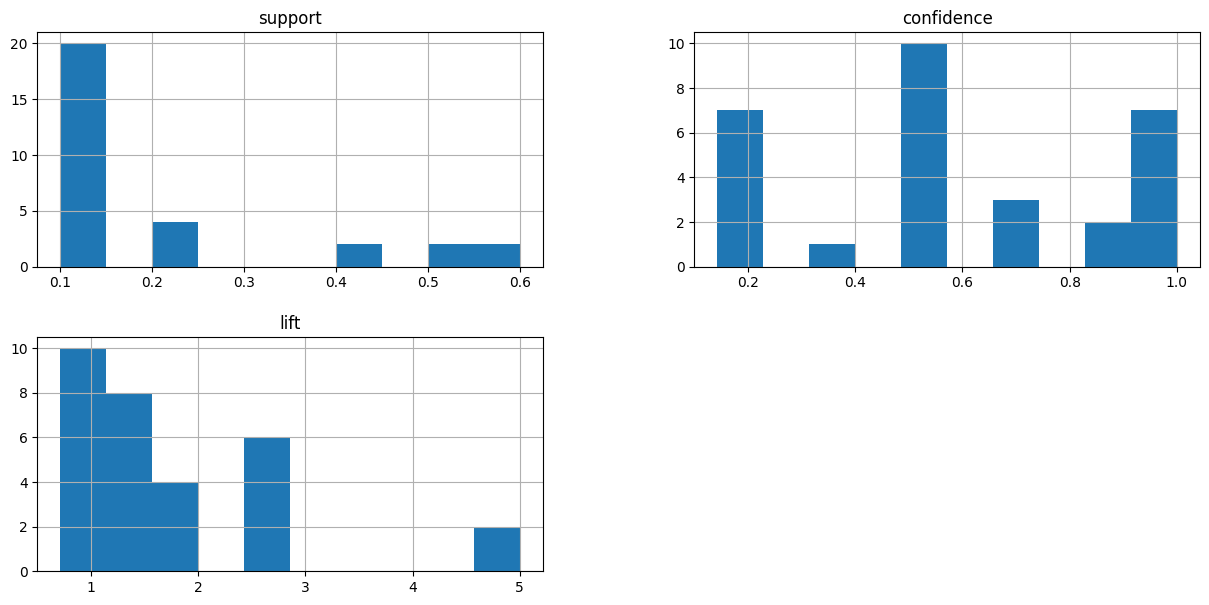

In [31]:
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [33]:
# Rule 3

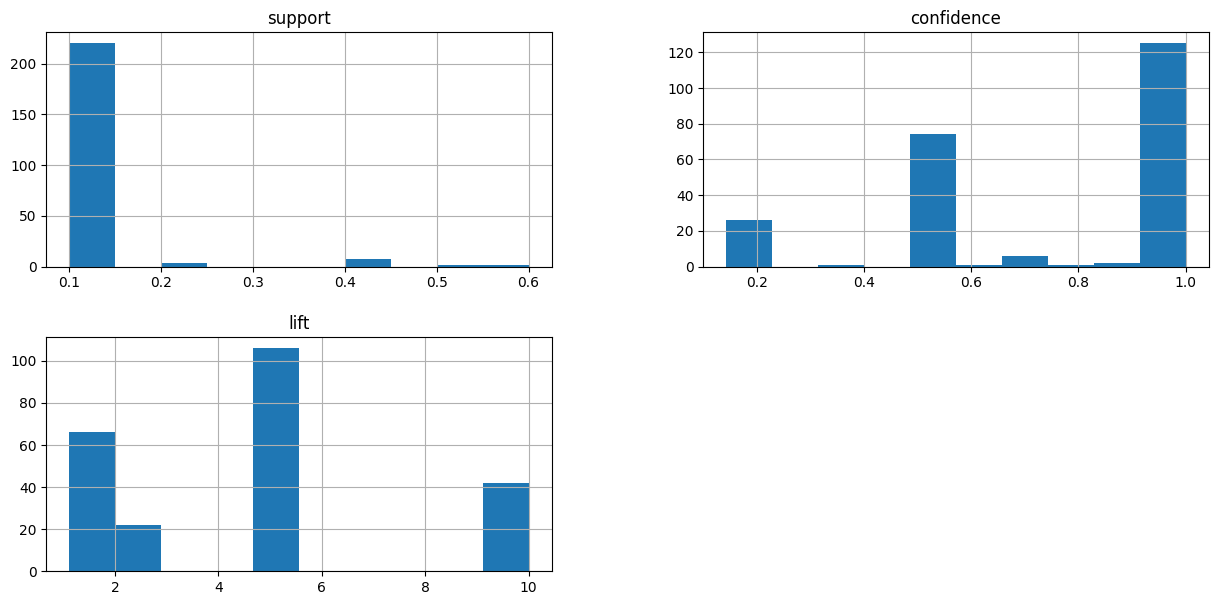

In [34]:
rules3[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

**model 2**

In [41]:
frequent_itemsets2 = apriori(movie2,min_support=0.3,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


In [42]:
rules4 = association_rules(frequent_itemsets2,metric='lift',min_threshold=1.0)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [43]:
rules5 = association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


**Data Visualization for Model 2**

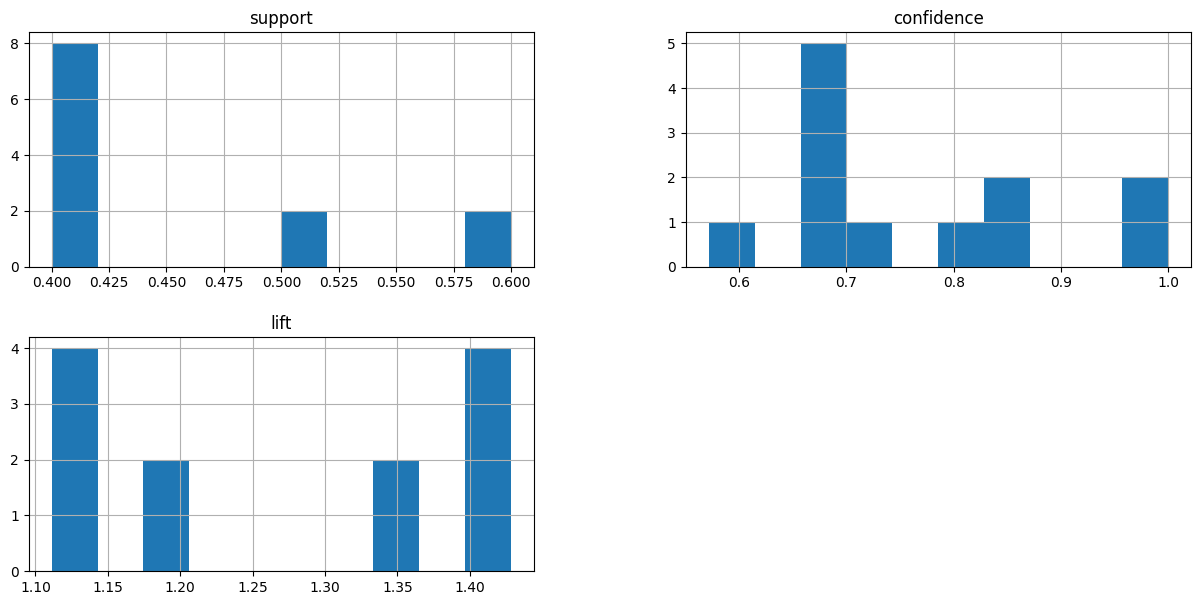

In [48]:
rules4[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

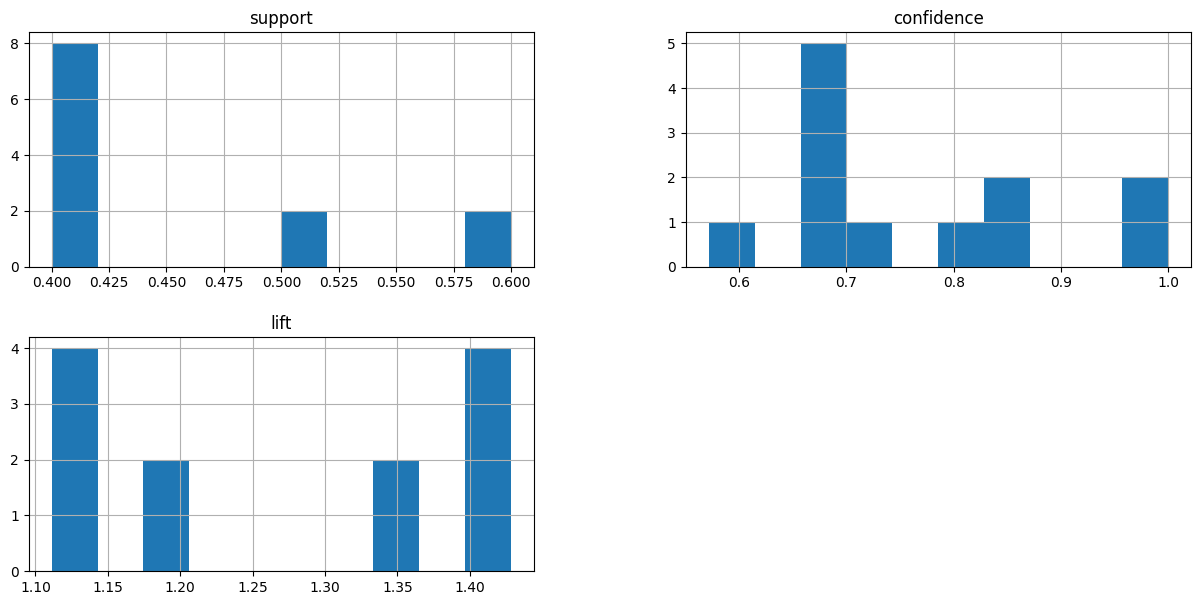

In [49]:
rules5[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()